###  사전 준비

In [93]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# 머신러닝 패키지 import
import statsmodels.api as sn # 안쓸껄?
import sklearn as sk

In [95]:
# 한글 설정 / 차트 마이너스 깨짐 현상 해결 / seaborn 화면 설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 전체 데이터 로드

In [96]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0,1000.0, 
               920.0, 955.0, 925.0, 975.0, 950.0,   6.7,   7.5,   7.0,   9.7,   9.8, 
                 8.7,  10.0,   9.9,   9.8,  12.2,  13.4,  12.2,  19.7,  19.9]

##### numpy 팁

In [97]:
# column_stack() ~= pandas DataFrame() 거의 비슷
# 두 리스트를 2차원 배열로 만드는 작업
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

### 생선데이터로 돌아가서

In [98]:
# row_stack도 있다~ 알고만 있으면 됨 사용하진 않는다
temp_data = np.row_stack((fish_length, fish_weight))
temp_data

array([[  25.4,   26.3,   26.5,   29. ,   29. ,   29.7,   29.7,   30. ,
          30. ,   30.7,   31. ,   31. ,   31.5,   32. ,   32. ,   32. ,
          33. ,   33. ,   33.5,   33.5,   34. ,   34. ,   34.5,   35. ,
          35. ,   35. ,   35. ,   36. ,   36. ,   37. ,   38.5,   38.5,
          39.5,   41. ,   41. ,    9.8,   10.5,   10.6,   11. ,   11.2,
          11.3,   11.8,   11.8,   12. ,   12.2,   12.4,   13. ,   14.3,
          15. ],
       [ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
         450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
         700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
         700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
         925. ,  975. ,  950. ,    6.7,    7.5,    7. ,    9.7,    9.8,
           8.7,   10. ,    9.9,    9.8,   12.2,   13.4,   12.2,   19.7,
          19.9]])

In [99]:
# [[l, w] for l, w in zip(fish_length, fish_weight)] -> 사용 NoNo~!!
fish_data = np.column_stack((fish_length, fish_weight)) # 튜플형태
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [100]:
# np.ones(), np.zeros()로 fish_target 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [101]:
len(fish_target)

49

### 사이킷런 
**train_test_spilt()**

In [102]:
# 훈련세트, 테스트세트 분리하는 함수
from sklearn.model_selection import train_test_split

In [103]:
# random_state 42 
# train_input 부터 test_target 튜플에 정해진 순서가 틀리면 안됨
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [104]:
train_input.shape

(36, 2)

In [105]:
train_target.shape

(36,)

In [106]:
test_input.shape

(13, 2)

In [107]:
test_target.shape

(13,)

In [108]:
# 3.3 : 1 비율로 도미의 비율이 높아서 훈련결과가 안좋을 수 있다.
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### fish_target의 값을 **계층화(stratify)** 비율 맞춰서 분할

In [109]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)

In [110]:
# test_target의 값 재확인
# 2.25 : 1 비율로 변경
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

## 수상한 도미!
length 25cm / weight 150g 

(1 = 도미, 0 = 빙어)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
kn = KNeighborsClassifier() # 객체 생성
kn.fit(X=train_input, y=train_target) # 훈련 실시

KNeighborsClassifier()

In [113]:
kn.score(X=test_input, y=test_target) # 정확도 확인 -> 1.0출력 : 100%

1.0

In [114]:
# 도미값 입력 예측
kn.predict([[25.0, 150.0]]) 
# 난 도미(1)! 근데 내가 빙어(0)라고?

array([0.])

### 산점도를 통해서 왜 도미가 빙어로 둔갑했는지

In [115]:
weird_bream = np.array([25.0, 150.0])
weird_bream[0]

25.0

In [116]:
weird_bream[1]

150.0

In [117]:
train_input[:,0]

array([29.7, 12.2, 33. , 11.3, 39.5, 29. , 36. , 36. , 31. , 35. , 37. ,
       11.2, 34.5, 12. , 29. , 33. , 30.7, 38.5, 33.5, 14.3, 31.5, 25.4,
        9.8, 32. , 10.5, 33.5, 10.6, 35. , 32. , 35. , 13. , 30. , 32. ,
       15. , 30. , 41. ])

In [118]:
train_input[:,1]

array([ 500. ,   12.2,  700. ,    8.7,  925. ,  430. ,  714. ,  850. ,
        475. ,  720. , 1000. ,    9.8,  620. ,    9.8,  363. ,  700. ,
        500. ,  955. ,  650. ,   19.7,  500. ,  242. ,    6.7,  600. ,
          7.5,  610. ,    7. ,  700. ,  600. ,  725. ,   12.2,  450. ,
        340. ,   19.9,  390. ,  975. ])

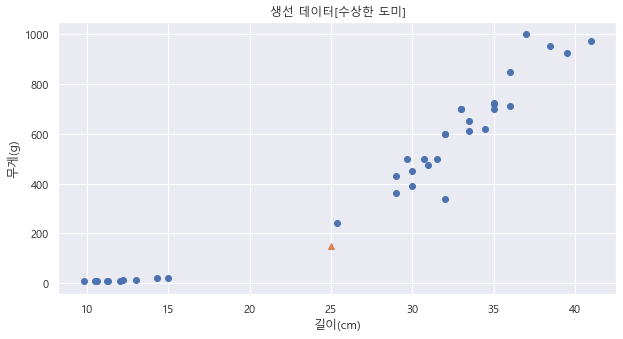

In [119]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^')
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

##### k-최근접 이웃을 찾아주는 함수
kneighbors()

In [120]:
distance, indices = kn.kneighbors([weird_bream])

In [121]:
distance # 물고기로 부터 얼마나 많이 떨어져있는가(거리차이)

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [122]:
indices # 전체 중에서 1,21,30,33,19번째에 있는 물고기

array([[21, 33, 19, 30,  1]], dtype=int64)

In [123]:
train_input[indices] # 최근접이웃 5개 값들

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

#### 찾아낸 이웃값들을 산점도에 표시

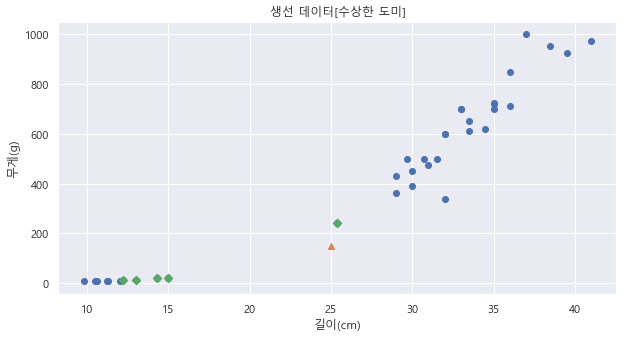

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) # 전체 생선데이터 
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 예측 생선데이터
plt.scatter(x=train_input[indices,0], y=train_input[indices, 1], marker='D') # k-최근접 이웃으로 도출된 데이터
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

-> 정확도가 100%라고해서 무조건 신뢰하긴 어렵다

#### 이유 
x축은 단위 5로, y축은 단위 200
-> 단위 기준을 맞추자!

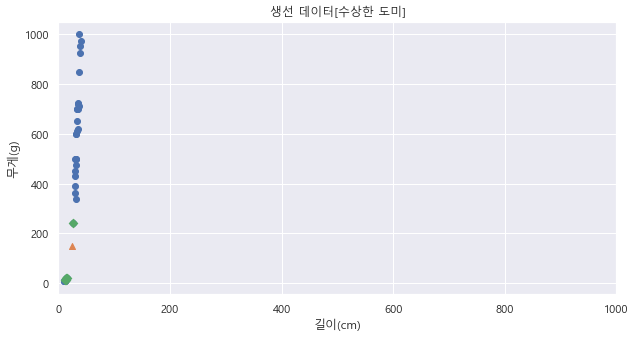

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) # 전체 생선데이터 
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 예측 생선데이터
plt.scatter(x=train_input[indices,0], y=train_input[indices, 1], marker='D') # k-최근접 이웃으로 도출된 데이터
plt.xlim(0, 1000) # x축 좌표 5단위 -> 1000단위
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 데이터 전처리가 필요하다!

In [126]:
# 훈련세트 데이터의 전체 평균
mean = np.mean(a=train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

생선 길이 평균 -> 27.2972

생선 무게 평균 -> 454.0972

In [127]:
# 훈련세트 데이터의 전체 표준편차
std = np.std(a=train_input, axis=0)
std

array([  9.98244253, 323.29893931])

생선 길이 표준편차 -> 9.9824

생선 무게 표준편차 -> 323.2989

In [128]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


#### 표준점수 도출
- 도출한 평균과 표준편차로 변경된 스케일 데이터 추출
    - (실제 값 - 평균) / 표준편차

In [129]:
trian_scaled= (train_input - mean) / std
trian_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

#### 재훈련

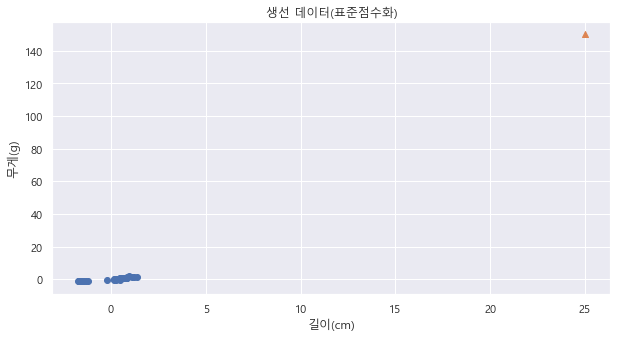

In [130]:
plt.figure(figsize=(10,5))
plt.scatter(x=trian_scaled[:,0], y=trian_scaled[:,1])
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 예측 도미값은 표준점수화를 하지 않았음!!
plt.title('생선 데이터(표준점수화)')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### weird_bream도 표준 점수화

In [131]:
std_weird_bream = (weird_bream - mean) /std
std_weird_bream

array([-0.23012627, -0.94060693])

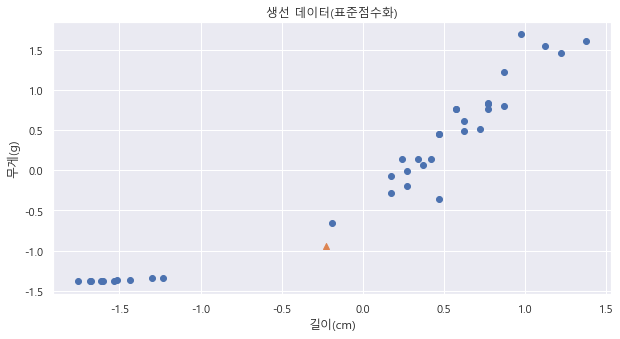

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(x=trian_scaled[:,0], y=trian_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')
plt.title('생선 데이터(표준점수화)')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.show()

In [133]:
train_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [134]:
kn.fit(X=trian_scaled, y=train_target)

KNeighborsClassifier()

In [135]:
# 테스트셋을 표준점수화 시키지 않으면 이러한 문제가 생김
kn.score(X=test_input, y=test_target)

0.6923076923076923

In [136]:
# 테스트셋도 표준점수화
test_scaled = (test_input - mean) /std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [137]:
kn.score(X=test_scaled, y=test_target)

1.0

In [138]:
# 재예측
kn.predict(X=[std_weird_bream]) # 도미로 제대로 출력됨

array([1.])

#### 산점도에서 다시 확인

In [139]:
dist, inds = kn.kneighbors([std_weird_bream])
print((dist, inds))

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]), array([[21, 14, 34, 32,  5]], dtype=int64))


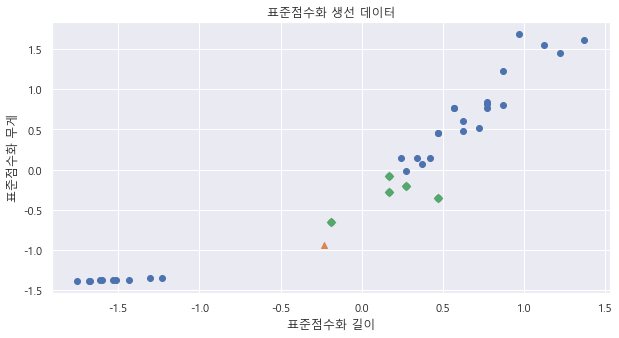

In [140]:
plt.figure(figsize=(10,5))
plt.scatter(x=trian_scaled[:,0], y=trian_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')
plt.scatter(x=trian_scaled[inds,0], y=trian_scaled[inds, 1], marker='D')
plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()

In [141]:
new_smelt = np.array([10.0, 8.7])
new_smelt

array([10. ,  8.7])

In [142]:
std_new_smelt = (new_smelt - mean) / std
std_new_smelt

array([-1.73276452, -1.37766373])

In [143]:
kn.predict(X=[std_new_smelt])

array([0.])

In [144]:
dist, inds = kn.kneighbors([std_new_smelt])
print((dist, inds))

(array([[0.02096849, 0.05022528, 0.0603351 , 0.1202592 , 0.13022865]]), array([[22, 24, 26, 11,  3]], dtype=int64))


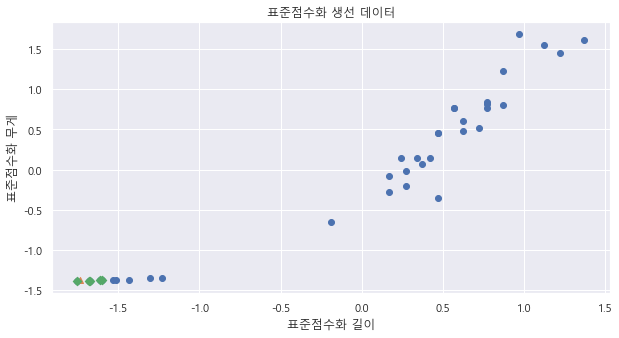

In [145]:
plt.figure(figsize=(10,5))
plt.scatter(x=trian_scaled[:,0], y=trian_scaled[:,1])
plt.scatter(x=std_new_smelt[0], y=std_new_smelt[1], marker='^')
plt.scatter(x=trian_scaled[inds,0], y=trian_scaled[inds, 1], marker='D')
plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()

데이터 전처리 방법
- 데이터 클리닝
- 데이터 통합
- 데이터 변환 : 오늘 수업에서 한 내용
- 데이터 축소
- 데이터 이산화